# EFGH Insurance Company

# Data Analyst - _Oluwatoyin Egunjobi_

# Data Source - Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance)

# _Stakeholder's Business Objective_ : _Healthcare Cost Analysis_

   "_Help the company and their clients (hospital) create insights on patient's healthcare cost_"

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

my_data = pd.read_csv(r"insurance.csv")

In [262]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [263]:
my_data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [264]:
# Capitalizing first letter of each column name
my_data.columns = my_data.columns.str.capitalize()

print("\nAfter capitalizing:\n")
print(list(my_data.columns))
print("\nDataFrame:\n")
print(my_data)


After capitalizing:

['Age', 'Sex', 'Bmi', 'Children', 'Smoker', 'Region', 'Charges']

DataFrame:

      Age     Sex     Bmi  Children Smoker     Region      Charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [265]:
# Checking for duplicates
my_data.duplicated().sum()

1

In [266]:
# Searching for the duplicate values
duplicates = my_data[my_data.duplicated(keep=False)]
print("\nDuplicate values:\n")
print(duplicates)


Duplicate values:

     Age   Sex    Bmi  Children Smoker     Region    Charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [267]:
# Remove duplicate
remove_duplicate = my_data.drop_duplicates()
print("\nAfter removing duplicates:\n")
print(remove_duplicate)

if remove_duplicate.duplicated().sum() > 0: #
    print("Duplicate still exists")
else:
    print("\n No More Duplicate Data")


After removing duplicates:

      Age     Sex     Bmi  Children Smoker     Region      Charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

 No More Duplicate Data


In [268]:
my_data.describe()

,Age,Bmi,Children,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [269]:
# Create a new Charge column in currency format in my region for display purpose.
my_data['Charges_display'] = my_data['Charges'].apply(lambda x: f'€{x:,.2f}')
my_data['Charges_display']

0       €16,884.92
1        €1,725.55
2        €4,449.46
3       €21,984.47
4        €3,866.86
           ...    
1333    €10,600.55
1334     €2,205.98
1335     €1,629.83
1336     €2,007.94
1337    €29,141.36
Name: Charges_display, Length: 1338, dtype: object

In [270]:
my_data.head(20)

,Age,Sex,Bmi,Children,Smoker,Region,Charges,Charges_display
0,19,female,27.900,0,yes,southwest,16884.92400,"€16,884.92"
1,18,male,33.770,1,no,southeast,1725.55230,"€1,725.55"
2,28,male,33.000,3,no,southeast,4449.46200,"€4,449.46"
3,33,male,22.705,0,no,northwest,21984.47061,"€21,984.47"
4,32,male,28.880,0,no,northwest,3866.85520,"€3,866.86"
5,31,female,25.740,0,no,southeast,3756.62160,"€3,756.62"
6,46,female,33.440,1,no,southeast,8240.58960,"€8,240.59"
7,37,female,27.740,3,no,northwest,7281.50560,"€7,281.51"
8,37,male,29.830,2,no,northeast,6406.41070,"€6,406.41"
9,60,female,25.840,0,no,northwest,28923.13692,"€28,923.14"


In [271]:
# Checking for outliers in the charges column by calculating the Z - Score
my_mean = my_data['Charges'].mean()
std_dev = my_data['Charges'].std()

# Z-scores
z_score = (my_data['Charges'] - my_mean) / std_dev
print(z_score)

0       0.298472
1      -0.953333
2      -0.728402
3       0.719574
4      -0.776512
          ...   
1333   -0.220468
1334   -0.913661
1335   -0.961237
1336   -0.930014
1337    1.310563
Name: Charges, Length: 1338, dtype: float64


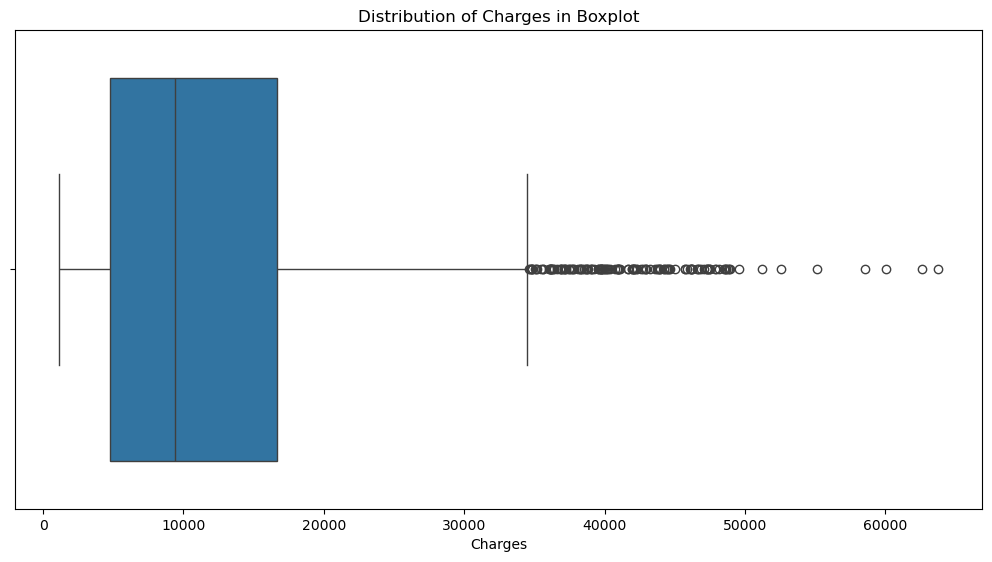

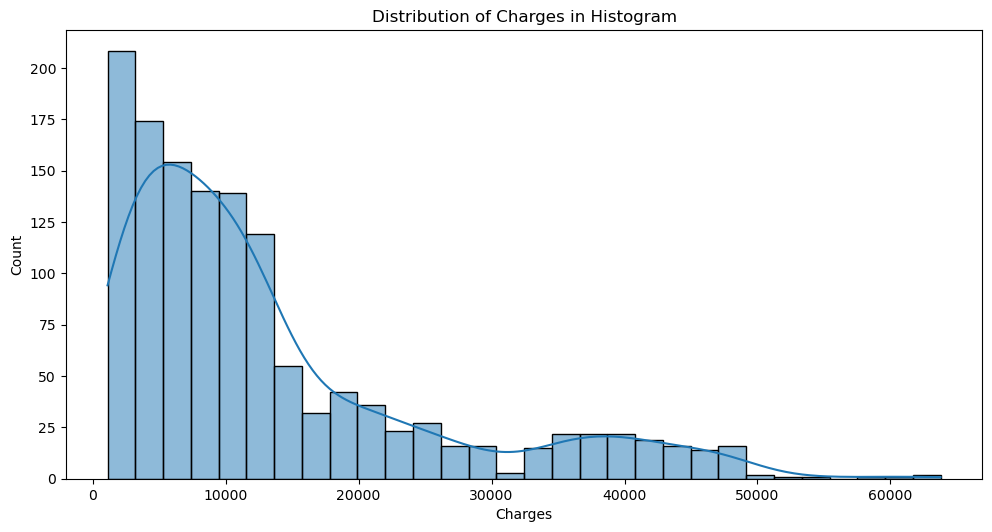

In [272]:
# Using Boxplot and histogram visualization for better understanding of the outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x = my_data['Charges'])
plt.title('Distribution of Charges in Boxplot')
plt.tight_layout(pad=1, w_pad=1, h_pad=1, rect=[0, 0, 1, 0.95])
plt.show()


plt.figure(figsize=(10, 6))
plt.title('Distribution of Charges in Histogram')
sns.histplot(x = my_data['Charges'], kde = True)
plt.tight_layout(pad=1, w_pad=1, h_pad=1,rect=[0, 0, 1, 0.9])
plt.show()


In [273]:
# Finding missing values
my_data.isnull()

,Age,Sex,Bmi,Children,Smoker,Region,Charges,Charges_display
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False


In [274]:
# View top 10 highest values
my_data.nlargest(10, 'Charges')

,Age,Sex,Bmi,Children,Smoker,Region,Charges,Charges_display
543,54,female,47.410,0,yes,southeast,63770.42801,"€63,770.43"
1300,45,male,30.360,0,yes,southeast,62592.87309,"€62,592.87"
1230,52,male,34.485,3,yes,northwest,60021.39897,"€60,021.40"
577,31,female,38.095,1,yes,northeast,58571.07448,"€58,571.07"
819,33,female,35.530,0,yes,northwest,55135.40209,"€55,135.40"
1146,60,male,32.800,0,yes,southwest,52590.82939,"€52,590.83"
34,28,male,36.400,1,yes,southwest,51194.55914,"€51,194.56"
1241,64,male,36.960,2,yes,southeast,49577.66240,"€49,577.66"
1062,59,male,41.140,1,yes,southeast,48970.24760,"€48,970.25"
488,44,female,38.060,0,yes,southeast,48885.13561,"€48,885.14"


In [275]:
# View bottom 10 lowest values
my_data.nsmallest(10, 'Charges')

,Age,Sex,Bmi,Children,Smoker,Region,Charges,Charges_display
940,18,male,23.21,0,no,southeast,1121.8739,"€1,121.87"
808,18,male,30.14,0,no,southeast,1131.5066,"€1,131.51"
1244,18,male,33.33,0,no,southeast,1135.9407,"€1,135.94"
663,18,male,33.66,0,no,southeast,1136.3994,"€1,136.40"
22,18,male,34.10,0,no,southeast,1137.0110,"€1,137.01"
194,18,male,34.43,0,no,southeast,1137.4697,"€1,137.47"
866,18,male,37.29,0,no,southeast,1141.4451,"€1,141.45"
781,18,male,41.14,0,no,southeast,1146.7966,"€1,146.80"
442,18,male,43.01,0,no,southeast,1149.3959,"€1,149.40"
1317,18,male,53.13,0,no,southeast,1163.4627,"€1,163.46"


# 1. BASIC COST ANALYSIS 

In [276]:
print('\n=== BASIC COST ANALYSIS ===\n')

# Age Group Analysis

print("\n1. Age Impact on Charges: \n")
my_data['age_category'] = pd.cut(my_data['Age'], bins=5,
                                 labels=['18-25', '26-35', '36-45', '46-55', '56-64'])
group_by_age = my_data.groupby('age_category', observed=True)
print(my_data.groupby('age_category', observed=True)['Charges'].agg(['mean', 'median', 'sum', 'count']).round(2))

# Gender Group Analysis

print("\n2. Gender Impact on Charges: \n")
group_by_sex = my_data.groupby('Sex')
print(my_data.groupby('Sex')['Charges'].agg(['mean', 'median', 'sum', 'count']).round(2))

# Smoking Group Analysis

print("\n3. Smoking Impact on Charges:\n")
group_by_smokers = my_data.groupby('Smoker')
print(my_data.groupby('Smoker')['Charges'].agg(['mean', 'median', 'sum', 'count']).round(2))

# Region Group Analysis

print("\n4. Region Impact on Charges:\n")
group_by_region = my_data.groupby('Region')
print(my_data.groupby('Region')['Charges'].agg(['mean', 'median', 'sum', 'count']).round(2))

# BMI Group Analysis

print("\n5. BMI Impact on Charges:\n")
my_data['Bmi_category'] = pd.cut(
    my_data['Bmi'],
    bins=[0, 18.5, 25, 30, 40, np.inf],
    labels=labels
)
group_by_bmi = my_data.groupby('Bmi_category', observed=True)
print(my_data.groupby('Bmi_category', observed=True)['Charges'].agg(['mean', 'median', 'sum', 'count']).round(2))


=== BASIC COST ANALYSIS ===


1. Age Impact on Charges: 

                  mean    median         sum  count
age_category                                       
18-25          9098.19   2876.38  3293545.59    362
26-35         10991.13   5246.05  2604896.84    237
36-45         13628.32   7623.52  3257168.20    239
46-55         15969.00  10297.33  4120001.51    258
56-64         18513.28  13226.77  4480212.85    242

2. Gender Impact on Charges: 

            mean   median         sum  count
Sex                                         
female  12569.58  9412.96  8321061.19    662
male    13956.75  9369.62  9434763.80    676

3. Smoking Impact on Charges:

            mean    median         sum  count
Smoker                                       
no       8434.27   7345.41  8974061.47   1064
yes     32050.23  34456.35  8781763.52    274

4. Region Impact on Charges:

               mean    median         sum  count
Region                                          
northeast  13406.38 

# 2. COMBINED RISK FACTOR ANALYSIS

In [277]:
print('\n=== COMBINED RISK FACTOR ANALYSIS ===\n')

# Age + Smoking Analysis
print('\n6. Age-Smoking Interaction:\n')
age_smoking = my_data.groupby(['age_category', 'Smoker'], observed=True)['Charges'].agg(['mean', 'median', 'sum', 'count']).round(2)
print(age_smoking)

# Sex + Age Analysis
print('\n7. Sex-Age Interaction:\n')
sex_age = my_data.groupby(['Sex', 'age_category'], observed=True)['Charges'].agg(['mean', 'median', 'sum', 'count']).round(2)
print(sex_age)





=== COMBINED RISK FACTOR ANALYSIS ===


6. Age-Smoking Interaction:

                         mean    median         sum  count
age_category Smoker                                       
18-25        no       4137.99   2457.50  1179327.13    285
             yes     27457.38  33732.69  2114218.46     77
26-35        no       5998.18   4837.58  1121659.07    187
             yes     29664.76  27103.33  1483237.77     50
36-45        no       8048.55   7167.69  1480933.70    184
             yes     32295.17  37829.72  1776234.51     55
46-55        no      11438.35   9864.89  2379176.07    208
             yes     34816.51  40224.08  1740825.44     50
56-64        no      14064.83  12919.94  2812965.50    200
             yes     39696.37  44716.38  1667247.35     42

7. Sex-Age Interaction:

                         mean    median         sum  count
Sex    age_category                                       
female 18-25          8815.96   3178.66  1533977.89    174
       26-35       

In [278]:
# Sex + Smoking Analysis
print('\n8. Sex-Smoking Interaction:\n')
sex_smoker = my_data.groupby(['Sex', 'Smoker'], observed=True)['Charges'].agg(['mean', 'median', 'sum', 'count']).round(2)
print(sex_smoker)


# Bmi + Region Analysis
print('\n9. Bmi-Region Interaction:\n')
# Create Bmi_category column if it doesn't exist
if 'Bmi_category' not in my_data.columns:
	my_data['Bmi_category'] = pd.cut(
		my_data['Bmi'],
		bins=[0, 18.5, 25, 30, 40, np.inf],
		labels=labels
	)
bmi_region = my_data.groupby(['Bmi_category', 'Region'], observed=True)['Charges'].agg(['mean', 'median', 'sum', 'count']).round(2)
print(bmi_region)


8. Sex-Smoking Interaction:

                   mean    median         sum  count
Sex    Smoker                                       
female no       8762.30   7639.42  4792976.62    547
       yes     30679.00  28950.47  3528084.57    115
male   no       8087.20   6985.51  4181084.85    517
       yes     33042.01  36085.22  5253678.95    159

9. Bmi-Region Interaction:

                                          mean    median         sum  count
Bmi_category               Region                                          
<18.5 (Underweight)        northeast   8914.42   9206.43    89144.24     10
                           northwest   9223.35   5116.50    64563.46      7
                           southwest   7025.58   3675.65    28102.34      4
18.5-24.9 (Normal)         northeast  11317.39   8688.86   826169.78     73
                           northwest  10000.52   8017.06   630032.48     63
                           southeast  13123.56  11833.78   538065.84     41
               

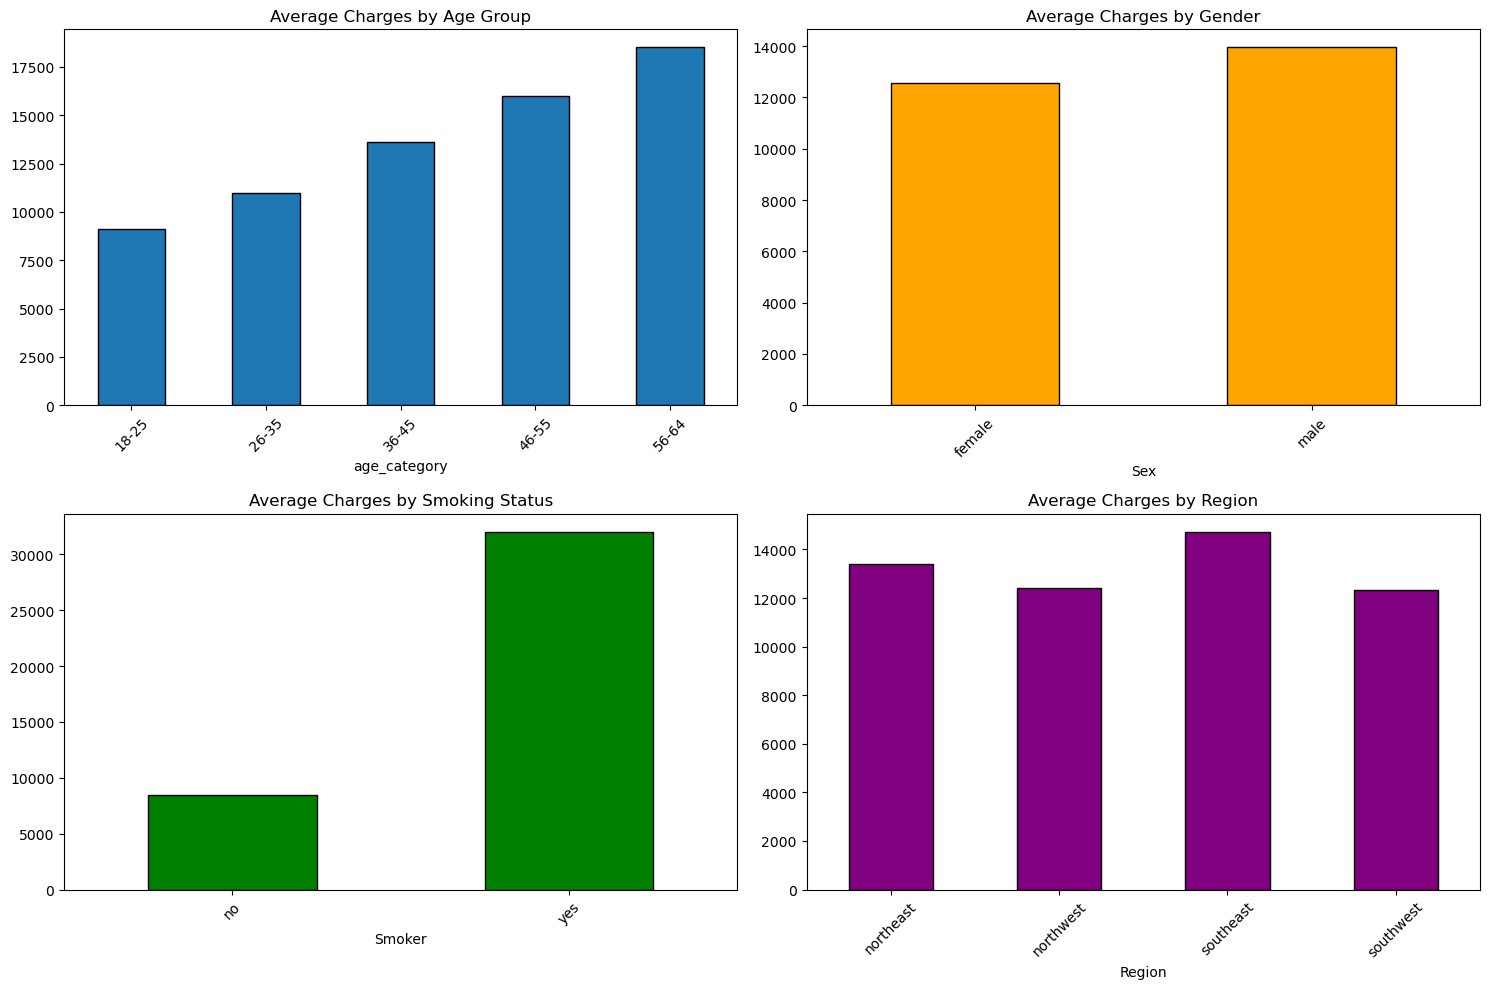

In [279]:
# Visualization of my analysis report

# Group plot
from matplotlib import pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age Impact on Charges
charges_by_age = my_data.groupby('age_category', observed=True)['Charges'].mean()
charges_by_age.plot(kind='bar', ax=axes[0, 0], title='Average Charges by Age Group', edgecolor = 'black')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gender Impact on Charges
charges_by_sex = my_data.groupby('Sex', observed=True)['Charges'].mean()
charges_by_sex.plot(kind='bar', ax=axes[0, 1], title='Average Charges by Gender', color='orange', edgecolor = 'black')
axes[0, 1].tick_params(axis='x', rotation=45)

# Smoking Impact on Charges
charges_by_smoking = my_data.groupby('Smoker', observed=True)['Charges'].mean()
charges_by_smoking.plot(kind='bar', ax=axes[1, 0], title='Average Charges by Smoking Status', color='green', edgecolor = 'black')
axes[1, 0].tick_params(axis='x', rotation=45)

# Region Impact on Charges
charges_by_region = my_data.groupby('Region', observed=True)['Charges'].mean()
charges_by_region.plot(kind='bar', ax=axes[1, 1], title='Average Charges by Region', color='purple', edgecolor = 'black')
axes[1, 1].tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()


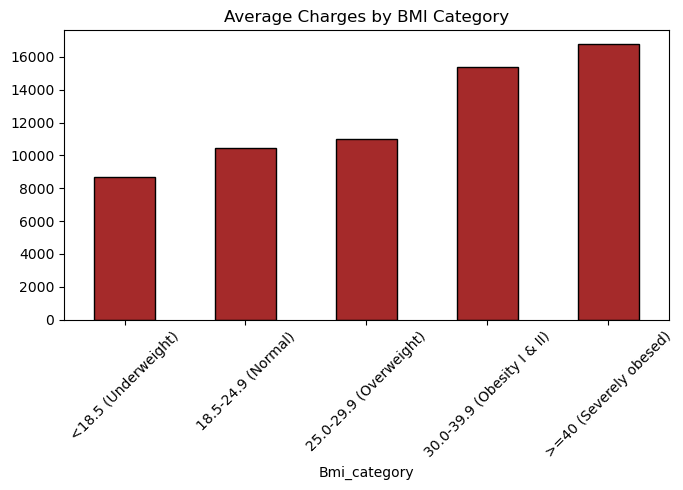

In [280]:
# BMI Impact on Charges
fig_bmi, ax_bmi = plt.subplots(figsize=(7, 5))
charges_by_bmi = my_data.groupby('Bmi_category', observed=True)['Charges'].mean()
charges_by_bmi.plot(kind='bar', ax=ax_bmi, title='Average Charges by BMI Category', color='brown', edgecolor = 'black')
ax_bmi.tick_params(axis='x', rotation=45)
fig_bmi.tight_layout()
plt.show()

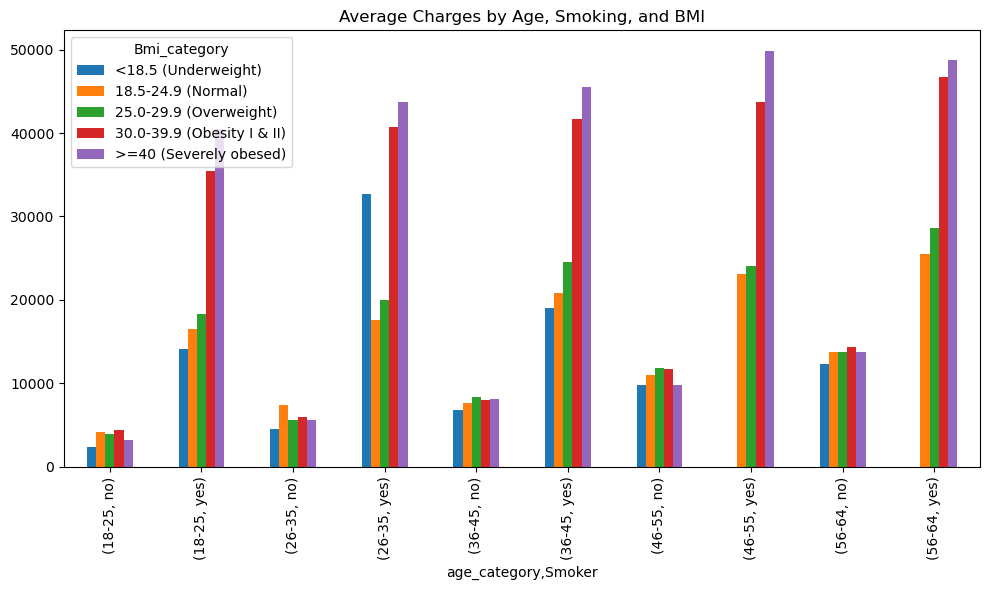

In [281]:
# Age, smoking, BMI interaction
fig_interaction, ax_interaction = plt.subplots(figsize=(10, 6))
interaction_data = my_data.groupby(['age_category', 'Smoker', 'Bmi_category'], observed=True)['Charges'].mean().unstack('Bmi_category')
interaction_data.plot(
	kind='bar',
	ax=ax_interaction,
	title='Average Charges by Age, Smoking, and BMI'
)
plt.tight_layout()
plt.show()

In [282]:
# Business Insights
print("\n=== BUSINESS INSIGHT ===\n")
print("1. Smoking is a significant factor in healthcare costs, with smokers experiencing higher charges.")
print("2. Age status also plays a crucial role, as older age groups tend to have higher healthcare costs.")
print("3. BMI is another important factor, with higher BMI categories associated with increased charges.")


=== BUSINESS INSIGHT ===

1. Smoking is a significant factor in healthcare costs, with smokers experiencing higher charges.
2. Age status also plays a crucial role, as older age groups tend to have higher healthcare costs.
3. BMI is another important factor, with higher BMI categories associated with increased charges.


In [283]:
# Saving the cleaned data to a new CSV file
my_data.to_csv('cleaned_insurance_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_insurance_data.csv'.")


Cleaned data saved to 'cleaned_insurance_data.csv'.
